In [1]:
import os
import numpy as np

import matplotlib
font = {'weight' : 'bold',
        'size'   : 9}

matplotlib.rc('font', **font)

import matplotlib.pyplot as plt # Plotting

from tifffile import imread

In [2]:
if not os.path.exists("../results"):
    os.mkdir("../results")

if not os.path.exists("../results/digital-twin"):
    os.mkdir("../results/digital-twin")

In [3]:
ref = imread("../data/Optimised-LSF-ref.tiff");
sim_no_noise = imread("../data/Optimised-LSF-sim-no-noise.tiff");
sim_noise = imread("../data/Optimised-LSF-sim-noise.tiff");

In [4]:
def plotInline(ref, sim, line_id, ylim, show_legend, fname, figsize=(9, 3), spacing=None, spacing_unit=None):
    
    fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    
    ax3.set_ylim(ylim)
    
    if spacing:
        ax1.imshow(ref, cmap="gray", vmin=ylim[0], vmax=ylim[1],
                   extent=[0,(ref.shape[1]-1)*spacing,0,(ref.shape[0]-1)*spacing])
        ax2.imshow(sim, cmap="gray", vmin=ylim[0], vmax=ylim[1],
                   extent=[0,(sim.shape[1]-1)*spacing,0,(sim.shape[0]-1)*spacing])
        
        ax1.plot([0, (ref.shape[1] - 1)*spacing], [(ref.shape[0]-line_id)*spacing, (ref.shape[0]-line_id)*spacing], color="blue")
        ax2.plot([0, (ref.shape[1] - 1)*spacing], [(ref.shape[0]-line_id)*spacing, (ref.shape[0]-line_id)*spacing], color="orange")

        x = np.linspace(0, ref.shape[1], ref.shape[1]) * spacing
        ax3.plot(x, ref[line_id], label="Experimental")
        ax3.plot(x, sim[line_id], label="Simulated")

    else:
        ax1.imshow(ref, cmap="gray", vmin=ylim[0], vmax=ylim[1])
        ax2.imshow(sim, cmap="gray", vmin=ylim[0], vmax=ylim[1])

        ax1.plot([0, ref.shape[1] - 1], [line_id, line_id], color="blue")
        ax2.plot([0, ref.shape[1] - 1], [line_id, line_id], color="orange")
        
        ax3.plot(ref[line_id], label="Experimental")
        ax3.plot(sim[line_id], label="Simulated")



    
    if show_legend:
        ax3.legend(prop={'size': 10})

    ax1.set_title("Experimental")
    ax2.set_title("Simulated")
    ax3.set_title("Intensity profiles")

    if spacing is None:
        ax1.axis("off")
        ax2.axis("off")
    elif spacing_unit is not None:
        ax1.set_xlabel("Pixel position (in " + spacing_unit + ")")
        ax1.set_ylabel("Pixel position (in " + spacing_unit + ")")
        ax2.set_xlabel("Pixel position (in " + spacing_unit + ")")
        ax2.set_ylabel("Pixel position (in " + spacing_unit + ")")
        ax3.set_xlabel("Pixel position (in " + spacing_unit + ")")
        ax3.set_ylabel("Pixel intensity")
           
    plt.tight_layout()

    plt.savefig(fname)
    plt.show()

In [5]:
SDD = 807.223 #mm
pixel_size = 0.15 #mm
SOD = 306.406 #mm
spacing=pixel_size * SOD / SDD

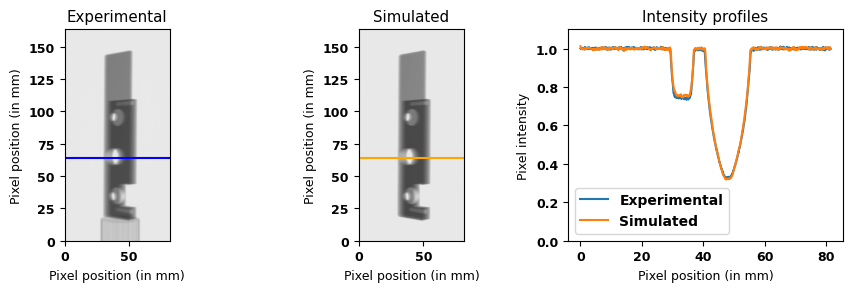

In [6]:
plotInline(imread("../data/Optimised-LSF-ref.tiff"),
           imread("../data/Optimised-LSF-sim-noise.tiff"),
           1744,
           (0,1.1),
           True,
           "../results/digital-twin/digital-twin-projections.pdf", 
           figsize=(9, 3),
           spacing=spacing, spacing_unit="mm")

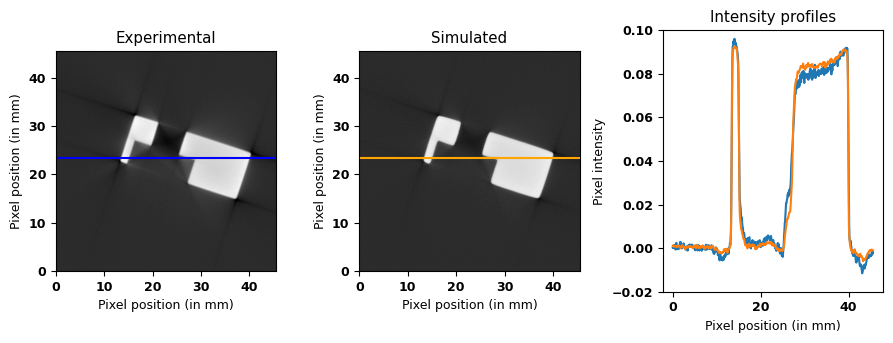

In [7]:
plotInline(imread("../data/experimental_idx_1490.tiff"),
           imread("../data/simulated_idx_1490.tiff"),
           390,
           (-0.02, 0.1),
           False,
           "../results/digital-twin/digital-twin-slices.pdf", 
           figsize=(9, 3.5),
           spacing=spacing, spacing_unit="mm")